# Task1:音频三分类任务(MED)




# 1. 数据处理

## 1.1 提取原始csv到txt

In [3]:
import pandas as pd

df = pd.read_csv('neurips_2021_zenodo_0_0_1.csv')
df['sound_type'] = df['sound_type'].map({'mosquito': 0, 'audio': 1, 'background': 2})

df = df[['id', 'sound_type']]
df.to_csv('wenzi.txt', header=False, index=False, sep=',')


In [8]:
%pip install pandas opencv-python moviepy librosa matplotlib numpy timm -i https://pypi.tuna.tsinghua.edu.cn//simple 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn//simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/18/54/01a8c4e35c75ca9724d19a7e4de9dc23f0ceb8769102c7de056113af61c3/moviepy-1.0.3.tar.gz (388 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/fe/85/834c70052b518bb8fca457d8ea4e60a65d9cc41f77fd409eeff3b3041638/timm-1.0.7-py3-none-any.whl (2.3 MB)
     ---------------------------------------- 22.6/22.6 MB 1.8 MB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/61/bf/2633ec37b1c87a82808d7aa07a1a9caa655ef6ce9c5ce541b02551397037/safetensors-0.4.3-cp39-none-win_amd64.whl (287 kB)
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110728 sha256=67b348fce96828383609e62610947b7135692b9bde9d6aee3d0582dd8326039a
  Stored in directory: c:\users\16937\appdata\local\pip\cache\wheels\9e\33\cd\6bb91d92cd8fc5a25c284f3eb0ac71eb

In [2]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True
import numpy as np

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import timm
import time

import pandas as pd
import numpy as np
import glob, os
from PIL import Image

## 1.2 将音频数据转为mel

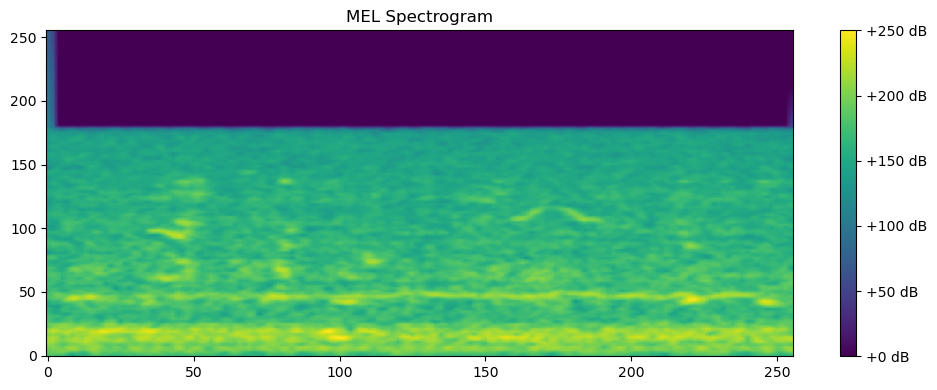

In [3]:
import moviepy.editor as mp
import librosa
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm

def generate_mel_spectrogram(audio_path, n_mels=128, fmax=8000, target_size=(256, 256)):
    # 加载音频文件
    y, sr = librosa.load(audio_path)
    # 生成MEL频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    # 将频谱图转换为dB单位
    S_dB = librosa.power_to_db(S, ref=np.max)
    # 归一化到0-255之间
    S_dB_normalized = cv2.normalize(S_dB, None, 0, 255, cv2.NORM_MINMAX)
    # 将浮点数转换为无符号8位整型
    S_dB_normalized = S_dB_normalized.astype(np.uint8)
    # 缩放到目标大小
    img_resized = cv2.resize(S_dB_normalized, target_size, interpolation=cv2.INTER_LINEAR)
    return img_resized

# 使用示例
audio_path = '.\\data\\audio\\222687.wav'  # 替换为您的视频文件路径
mel_spectrogram_image = generate_mel_spectrogram(audio_path)

# 显示图片
plt.figure(figsize=(10, 4))  # 可以调整图像大小
plt.imshow(mel_spectrogram_image, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')  # 显示颜色条
plt.title('MEL Spectrogram')
plt.tight_layout()  # 确保布局整齐
plt.show()

In [6]:
import os
import librosa
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm

def generate_mel_spectrogram(audio_path, save_path, n_mels=128, fmax=8000, target_size=(256, 256)):
    # 加载音频文件
    y, sr = librosa.load(audio_path)
    # 生成MEL频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    # 将频谱图转换为dB单位
    S_dB = librosa.power_to_db(S, ref=np.max)
    # 归一化到0-255之间
    S_dB_normalized = cv2.normalize(S_dB, None, 0, 255, cv2.NORM_MINMAX)
    # 将浮点数转换为无符号8位整型
    S_dB_normalized = S_dB_normalized.astype(np.uint8)
    # 缩放到目标大小
    img_resized = cv2.resize(S_dB_normalized, target_size, interpolation=cv2.INTER_LINEAR)
    
    # 保存图片
    cv2.imwrite(save_path, img_resized)

def process_audio_files(audio_dir, pic_dir):
    audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
    for file in tqdm(audio_files, desc="Processing Audio Files"):
        try:
            audio_path = os.path.join(audio_dir, file)
            save_path = os.path.join(pic_dir, file.replace('.wav', '.jpg'))
            generate_mel_spectrogram(audio_path, save_path)
        except Exception as e:
            print(f"Error processing {audio_path}: {e}")

# 目录路径设置
audio_dir = '.\\data\\audio\\'
pic_dir = '.\\data\\pic\\'
os.makedirs(pic_dir, exist_ok=True)  # 确保输出目录存在

# 处理所有音频文件
process_audio_files(audio_dir, pic_dir)


Processing Audio Files: 100%|██████████| 9295/9295 [07:37<00:00, 20.32it/s]


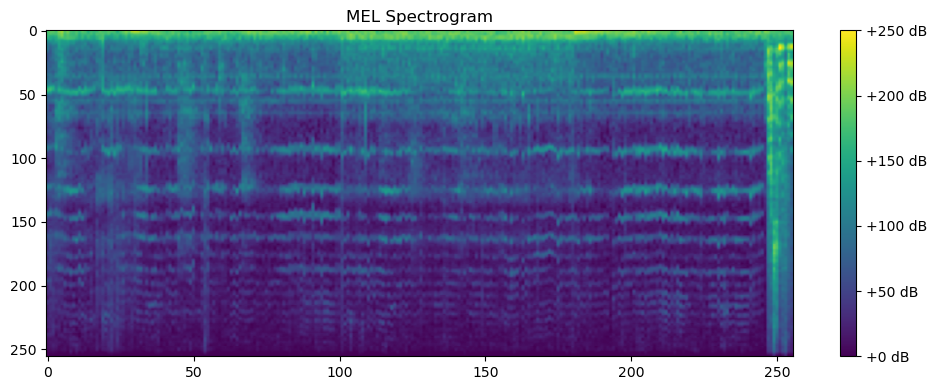

In [9]:
def display_mel_spectrogram(image_path):
    # 使用OpenCV读取图片
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # 使用matplotlib显示图片
    plt.figure(figsize=(10, 4))  # 设置显示图像的大小
    plt.imshow(img, aspect='auto', cmap='viridis')  # 使用viridis颜色映射
    plt.colorbar(format='%+2.0f dB')  # 显示颜色条
    plt.title('MEL Spectrogram')  # 设置图像标题
    plt.tight_layout()  # 确保布局整齐
    plt.show()  # 显示图像

# 图片目录
image_path = '.\\data\\pic\\668.jpg'
display_mel_spectrogram(image_path)

# 2. 训练模型

## 2.1 模型选择
主要选取了ResNet18、EfficientNet-B0、DenseNet-121，目的使用更小的参数量得到更优异的表现。


以下是 ResNet18、EfficientNet-B0、DenseNet-121、ResNet50 和 VGGish 的参数数量对比表格：

| 神经网络       | 主要结构特点                                             | 参数数量 (百万) |
|----------------|----------------------------------------------------------|----------------|
| **ResNet18**   | 残差块（Residual Block）                                  | 11.7           |
| **EfficientNet-B0** | MBConv，复合缩放（Compound Scaling）                     | 5.3            |
| **DenseNet-121** | 密集连接（Dense Connectivity）                           | 8              |
| **ResNet50**   | 残差块（Residual Block），更深层次网络                     | 25.6           |
| **VGGish**     | VGG16 的变种，主要用于音频嵌入（音频分类任务）              | 62             |


### ResNet18

**网络结构**：
ResNet18 是 ResNet（Residual Network）系列中的一个版本，采用残差块（Residual Block）来实现网络的深层次学习。其主要结构如下：
- **输入层**：7x7 卷积，64 通道，步幅 2，后接 3x3 最大池化，步幅 2
- **残差块 1**：2 个卷积层，每层 3x3，64 通道
- **残差块 2**：2 个卷积层，每层 3x3，128 通道
- **残差块 3**：2 个卷积层，每层 3x3，256 通道
- **残差块 4**：2 个卷积层，每层 3x3，512 通道
- **全局平均池化**：平均池化到 1x1
- **全连接层**：1000 单元，softmax 激活（用于 ImageNet 分类）


### EfficientNet-B0

**网络结构**：
EfficientNet-B0 是 EfficientNet 系列中的一个基础版本，以复合缩放（Compound Scaling）方法来平衡网络深度、宽度和分辨率。其主要结构如下：
- **Stem**：3x3 卷积，32 通道，步幅 2
- **MBConv1**：1 个 Mobile Inverted Bottleneck，16 通道
- **MBConv6**：2 个 Mobile Inverted Bottleneck，24 通道
- **MBConv6**：2 个 Mobile Inverted Bottleneck，40 通道
- **MBConv6**：3 个 Mobile Inverted Bottleneck，80 通道
- **MBConv6**：3 个 Mobile Inverted Bottleneck，112 通道
- **MBConv6**：4 个 Mobile Inverted Bottleneck，192 通道
- **MBConv6**：1 个 Mobile Inverted Bottleneck，320 通道
- **Head**：1x1 卷积，1280 通道
- **全局平均池化**：平均池化到 1x1
- **全连接层**：1000 单元，softmax 激活（用于 ImageNet 分类）


### DenseNet-121

**网络结构**：
DenseNet-121 是 DenseNet（Densely Connected Convolutional Network）系列中的一个版本，通过密集连接（Dense Connectivity）来提高信息流通和梯度传递。其主要结构如下：
- **输入层**：7x7 卷积，64 通道，步幅 2，后接 3x3 最大池化，步幅 2
- **Dense Block 1**：6 个 dense 层，每层 32 通道
- **Transition Layer 1**：1x1 卷积，128 通道，2x2 平均池化，步幅 2
- **Dense Block 2**：12 个 dense 层，每层 32 通道
- **Transition Layer 2**：1x1 卷积，256 通道，2x2 平均池化，步幅 2
- **Dense Block 3**：24 个 dense 层，每层 32 通道
- **Transition Layer 3**：1x1 卷积，512 通道，2x2 平均池化，步幅 2
- **Dense Block 4**：16 个 dense 层，每层 32 通道
- **全局平均池化**：平均池化到 1x1
- **全连接层**：1000 单元，softmax 激活（用于 ImageNet 分类）






In [1]:
import os
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'

## 2.2 工具类

In [2]:
import os
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True
import numpy as np

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import timm
import time

import pandas as pd
import numpy as np
import glob, os
from PIL import Image

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

class ProgressMeter(object):
    def __init__(self, num_batches, *meters):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = ""


    def pr2int(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

## 2.3 训练和验证过程

In [3]:
import os
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True
import numpy as np

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import timm
import time

import pandas as pd
import numpy as np
import glob, os
from PIL import Image
def validate(test_loader, model, criterion):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    progress = ProgressMeter(len(test_loader), batch_time, losses, top1)

    # switch to evaluate mode
    model.eval()

    with torch.no_grad():
        end = time.time()
        for i, (input, target) in enumerate(test_loader):
            input = input.cuda()
            target = target.cuda()
            # compute output
            output = model(input)
            loss = criterion(output, target)
            # measure accuracy and record loss
            acc = (output.argmax(1).view(-1) == target.float().view(-1)).float().mean() * 100
            losses.update(loss.item(), input.size(0))
            top1.update(acc, input.size(0))
            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()
        # TODO: this should also be done with the ProgressMeter
        print(' * Acc@1 {top1.avg:.3f}'
              .format(top1=top1))
        return top1


def train(train_loader, model, criterion, optimizer, epoch):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    progress = ProgressMeter(len(train_loader), batch_time, losses, top1)
    # switch to train mode
    model.train()
    end = time.time()
    for i, (input, target) in enumerate(train_loader):
        input = input.cuda(non_blocking=True)
        target = target.cuda(non_blocking=True)
        # compute output
        output = model(input)
        loss = criterion(output, target)
        # measure accuracy and record loss
        losses.update(loss.item(), input.size(0))
        acc = (output.argmax(1).view(-1) == target.float().view(-1)).float().mean() * 100
        top1.update(acc, input.size(0))
        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if i % 100 == 0:
            progress.pr2int(i)

## 2.4 构造数据加载器

实测：8GB显存最好batch_size设置在20-40,40GB显存可是设置在150左右。

In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# 读取wenzi.txt文件
df = pd.read_csv('wenzi.txt', header=None)  # 假设文件没有表头

# 将数据分为训练集和测试集，比例为8:2
train_label, test_label = train_test_split(df, test_size=0.2, random_state=42)

# 修改文件名，添加路径，并假设文件名是第一列
train_label[0] = train_label[0].apply(lambda x: str(x) + '.jpg')
test_label[0] = test_label[0].apply(lambda x: str(x) + '.jpg')

# 添加path属性
train_label[0] = '.\\data\\pic\\' + train_label[0]
test_label[0] = '.\\data\\pic\\' + test_label[0]

# 重命名第一列为目标列
train_label = train_label.rename(columns={1: 'target'})
test_label = test_label.rename(columns={1: 'target'})
train_label = train_label.rename(columns={0: 'path'})
test_label = test_label.rename(columns={0: 'path'})


# 过滤出实际存在的文件路径
train_label = train_label[train_label['path'].apply(os.path.exists)]
test_label = test_label[test_label['path'].apply(os.path.exists)]

train_label,test_label

# img = Image.open(train_label).convert('RGB')
# train_label['path'].values


(                       path  target
 7485  .\data\pic\201906.jpg       2
 8599  .\data\pic\201361.jpg       2
 2906  .\data\pic\220337.jpg       0
 3994  .\data\pic\222088.jpg       0
 108      .\data\pic\102.jpg       0
 ...                     ...     ...
 5734    .\data\pic\2417.jpg       0
 5191  .\data\pic\219168.jpg       0
 5390  .\data\pic\219753.jpg       2
 860      .\data\pic\753.jpg       1
 7270  .\data\pic\201101.jpg       2
 
 [7436 rows x 2 columns],
                        path  target
 7862  .\data\pic\201201.jpg       2
 1112    .\data\pic\1008.jpg       1
 6909  .\data\pic\207888.jpg       0
 4058  .\data\pic\220027.jpg       2
 3733  .\data\pic\221824.jpg       0
 ...                     ...     ...
 4004  .\data\pic\222118.jpg       0
 4467  .\data\pic\222549.jpg       0
 6851  .\data\pic\207788.jpg       0
 5048  .\data\pic\219092.jpg       2
 7178  .\data\pic\201719.jpg       2
 
 [1859 rows x 2 columns])

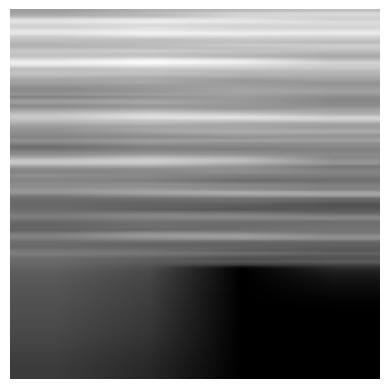

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open(train_label['path'].values[33]).convert('RGB')
# 显示图像
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.show()


In [6]:
class FFDIDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None
    
    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')
        # print(f"Loaded image path: {self.img_path[index]}")
        if self.transform is not None:
            img = self.transform(img)
        
        return img, torch.from_numpy(np.array(self.img_label[index]))
    
    def __len__(self):
        return len(self.img_path)

In [7]:
train_loader = torch.utils.data.DataLoader(
    FFDIDataset(train_label['path'].values, train_label['target'].values, 
            transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomVerticalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    ), batch_size=20, shuffle=True, pin_memory=True
)
# num_workers=12, pin_memory=True

test_loader = torch.utils.data.DataLoader(
    FFDIDataset(test_label['path'].values, test_label['target'].values, 
            transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    ), batch_size=20, shuffle=False, pin_memory=True
)

# model = timm.create_model('resnet18', pretrained=True, num_classes=3)
# Model name: ResNet
# Number of parameters: 11178051
# Model state: True


model = timm.create_model('densenet121', pretrained=True, num_classes=3)
model = model.cuda()
# 检查模型名称
print(f"Model name: {model.__class__.__name__}")

# 检查模型参数数量
print(f"Number of parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# 检查模型状态（训练或评估）
print(f"Model state: {model.training}")



Model name: DenseNet
Number of parameters: 6956931
Model state: True


## 2.5 开始训练

In [10]:
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), 0.003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.85)
best_acc = 0.0
for epoch in range(10):
    scheduler.step()
    print('Epoch: ', epoch)
    train(train_loader, model, criterion, optimizer, epoch)
    val_acc = validate(test_loader, model, criterion)
    if val_acc.avg.item() > best_acc:
        best_acc = round(val_acc.avg.item(), 2)
        torch.save(model.state_dict(), f'./mymodel/{model.__class__.__name__}_{best_acc}.pt')

h:\exploit_python\environment\anaconda\envs\sml\lib\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch:  0
[  0/372]	Time  6.523 ( 6.523)	Loss 9.5620e-01 (9.5620e-01)	Acc@1  60.00 ( 60.00)
[100/372]	Time  1.020 ( 0.901)	Loss 2.2830e-01 (3.9650e-01)	Acc@1  90.00 ( 86.44)
[200/372]	Time  2.312 ( 1.529)	Loss 1.8065e-01 (3.2920e-01)	Acc@1  90.00 ( 88.26)
[300/372]	Time  2.317 ( 1.782)	Loss 1.4290e-01 (2.7225e-01)	Acc@1  95.00 ( 90.40)
 * Acc@1 84.777
Epoch:  1
[  0/372]	Time  2.011 ( 2.011)	Loss 2.0166e-01 (2.0166e-01)	Acc@1  85.00 ( 85.00)
[100/372]	Time  1.895 ( 1.862)	Loss 7.7843e-02 (1.6153e-01)	Acc@1 100.00 ( 94.60)
[200/372]	Time  1.907 ( 1.829)	Loss 5.2962e-02 (1.5118e-01)	Acc@1 100.00 ( 95.15)
[300/372]	Time  2.093 ( 1.839)	Loss 6.9164e-02 (1.4535e-01)	Acc@1  95.00 ( 95.40)
 * Acc@1 67.456
Epoch:  2
[  0/372]	Time  1.813 ( 1.813)	Loss 4.9243e-02 (4.9243e-02)	Acc@1 100.00 (100.00)
[100/372]	Time  1.829 ( 1.823)	Loss 1.0532e-01 (1.5236e-01)	Acc@1  95.00 ( 95.20)
[200/372]	Time  1.745 ( 1.799)	Loss 8.5073e-03 (1.2893e-01)	Acc@1 100.00 ( 95.65)
[300/372]	Time  1.804 ( 1.788)	Loss 

# 3. 推理

In [1]:
import os
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'

In [2]:
import os
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True
import numpy as np

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import timm
import time

import pandas as pd
import numpy as np
import glob, os
from PIL import Image


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split


# 读取wenzi.txt文件
df = pd.read_csv('wenzi.txt', header=None)  # 假设文件没有表头

# 将数据分为训练集和测试集，比例为8:2
train_label, test_label = train_test_split(df, test_size=0.2, random_state=42)

# 修改文件名，添加路径，并假设文件名是第一列
train_label[0] = train_label[0].apply(lambda x: str(x) + '.jpg')
test_label[0] = test_label[0].apply(lambda x: str(x) + '.jpg')

# 添加path属性
train_label[0] = '.\\data\\pic\\' + train_label[0]
test_label[0] = '.\\data\\pic\\' + test_label[0]


# 重命名第一列为目标列
train_label = train_label.rename(columns={1: 'target'})
test_label = test_label.rename(columns={1: 'target'})
train_label = train_label.rename(columns={0: 'path'})
test_label = test_label.rename(columns={0: 'path'})


# 指定保存文件的路径
file_path = './mymodel/wenzi_test.csv'

# 保存 DataFrame 到 CSV 文件
test_label.to_csv(file_path, index=False)

In [3]:
import torch
import numpy as np
import time
import torch.nn.functional as F

class FFDIDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None
    
    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')
        # print(f"Loaded image path: {self.img_path[index]}")
        if self.transform is not None:
            img = self.transform(img)
        
        return img, torch.from_numpy(np.array(self.img_label[index]))
    
    def __len__(self):
        return len(self.img_path)

def predict(test_loader, model, tta=10):
    # switch to evaluate mode
    model.eval()
    
    test_pred_tta = None
    for _ in range(tta):
        test_pred = []
        with torch.no_grad():
            end = time.time()
            for i, (input, target) in enumerate(test_loader):
                input = input.cuda()
                target = target.cuda()

                # compute output
                output = model(input)
                output = F.softmax(output, dim=1)
                output = output.data.cpu().numpy()

                test_pred.append(output)
        test_pred = np.vstack(test_pred)
    
        if test_pred_tta is None:
            test_pred_tta = test_pred
        else:
            test_pred_tta += test_pred
    
    # Average the predictions over TTA runs
    test_pred_tta /= tta
    
    # Get the class with the highest probability
    test_pred_classes = np.argmax(test_pred_tta, axis=1)
    
    return test_pred_classes



In [4]:
# 加载训练好的模型
model = timm.create_model('resnet18', pretrained=False, num_classes=3)
weights_path = './mymodel/ResNet_99.19.pt'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 将模型移动到指定的设备
model.to(device)

# 从本地文件加载权重
weights = torch.load(weights_path, map_location=device)  # 确保权重加载到相同的设备
model.load_state_dict(weights)

<All keys matched successfully>

In [5]:
test_label = pd.read_csv('./mymodel/test_predictions.csv')  # 假设文件没有表头

test_loader = torch.utils.data.DataLoader(
    FFDIDataset(test_label['path'].values, test_label['target'].values, 
            transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    ), batch_size=20, shuffle=False, pin_memory=True
)

test_pred = predict(test_loader, model, 1)
test_label["resnet18_y_pred"] = test_pred
test_label

,path,target,efficientnet_b0_y_pred,densenet121_y_pred,resnet18_y_pred
0,.\data\pic\201201.jpg,2,2,2,2
1,.\data\pic\1008.jpg,1,1,1,1
2,.\data\pic\207888.jpg,0,0,0,0
3,.\data\pic\220027.jpg,2,2,2,2
4,.\data\pic\221824.jpg,0,0,0,0
...,...,...,...,...,...
1854,.\data\pic\222118.jpg,0,0,0,0
1855,.\data\pic\222549.jpg,0,0,0,0
1856,.\data\pic\207788.jpg,0,0,0,0
1857,.\data\pic\219092.jpg,2,2,2,2


In [6]:
# 指定保存文件的路径
file_path = './mymodel/test_predictions.csv'

# 保存 DataFrame 到 CSV 文件
test_label.to_csv(file_path, index=False)

# 4. 评估

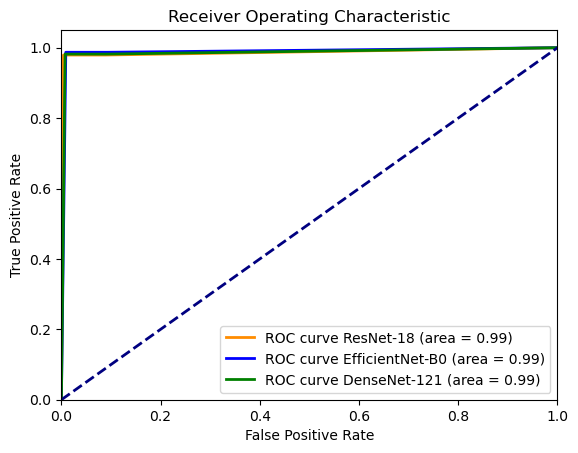

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
# 读取CSV文件
df = pd.read_csv('./mymodel/test_predictions.csv')

# 提取目标变量和预测值
y_true = df['target']
y_pred_resnet = df['resnet18_y_pred']
y_pred_efficientnet = df['efficientnet_b0_y_pred']
y_pred_densenet = df['densenet121_y_pred']

label_mapping = {0: 'mosquito', 1: 'audio', 2: 'background'}
labels = list(label_mapping.values())

# 绘制ROC曲线
def plot_roc_curve(y_true, y_pred_resnet, y_pred_efficientnet, y_pred_densenet):
    fpr_resnet, tpr_resnet, _ = roc_curve(y_true, y_pred_resnet, pos_label=2)
    fpr_efficientnet, tpr_efficientnet, _ = roc_curve(y_true, y_pred_efficientnet, pos_label=2)
    fpr_densenet, tpr_densenet, _ = roc_curve(y_true, y_pred_densenet, pos_label=2)

    roc_auc_resnet = auc(fpr_resnet, tpr_resnet)
    roc_auc_efficientnet = auc(fpr_efficientnet, tpr_efficientnet)
    roc_auc_densenet = auc(fpr_densenet, tpr_densenet)

    plt.figure()
    plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label='ROC curve ResNet-18 (area = %0.2f)' % roc_auc_resnet)
    plt.plot(fpr_efficientnet, tpr_efficientnet, color='blue', lw=2, label='ROC curve EfficientNet-B0 (area = %0.2f)' % roc_auc_efficientnet)
    plt.plot(fpr_densenet, tpr_densenet, color='green', lw=2, label='ROC curve DenseNet-121 (area = %0.2f)' % roc_auc_densenet)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# 绘制混淆矩阵
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def plot_model_comparison(y_true, y_pred_resnet, y_pred_efficientnet, y_pred_densenet):
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }

    for model_name, y_pred in zip(['ResNet-18', 'EfficientNet-B0', 'DenseNet-121'], [y_pred_resnet, y_pred_efficientnet, y_pred_densenet]):
        metrics['Model'].append(model_name)
        metrics['Accuracy'].append(accuracy_score(y_true, y_pred))
        metrics['Precision'].append(precision_score(y_true, y_pred, average='macro'))
        metrics['Recall'].append(recall_score(y_true, y_pred, average='macro'))
        metrics['F1 Score'].append(f1_score(y_true, y_pred, average='macro'))

    metrics_df = pd.DataFrame(metrics)
    metrics_df.set_index('Model', inplace=True)

    # 自定义颜色 (基于 #197196 的不同色调)
    colors = {
        'Accuracy': '#003f5c',  # 深蓝色
        'Precision': '#58508d',  # 深紫蓝色
        'Recall': '#bc5090',  # 粉蓝色
        'F1 Score': '#ff6361'  # 明亮的红蓝色
    }
    
    # 设置柱子的宽度和间隔
    bar_width = 0.15
    gap = 0.05
    num_metrics = len(metrics_df.columns)
    num_models = len(metrics_df.index)
    
    x = range(num_models)
    fig, ax = plt.subplots(figsize=(14, 8))

    for idx, metric in enumerate(metrics_df.columns):
        # 计算每个柱子的位置
        offset = (bar_width + gap) * (idx - num_metrics // 2)  # Centering bars for each metric
        ax.bar(
            [p + offset for p in x], 
            metrics_df[metric], 
            bar_width, 
            label=metric,
            color=colors[metric]
        )

    # 设置标签和标题
    ax.set_title('Model Comparison')
    ax.set_ylabel('Score')
    ax.set_xticks(x)  # X轴刻度位置
    ax.set_xticklabels(metrics_df.index)  # X轴标签
    ax.set_ylim(0, 1)  # Y轴范围
    ax.legend()

    plt.show()

# 调用函数绘图
plot_roc_curve(y_true, y_pred_resnet, y_pred_efficientnet, y_pred_densenet)




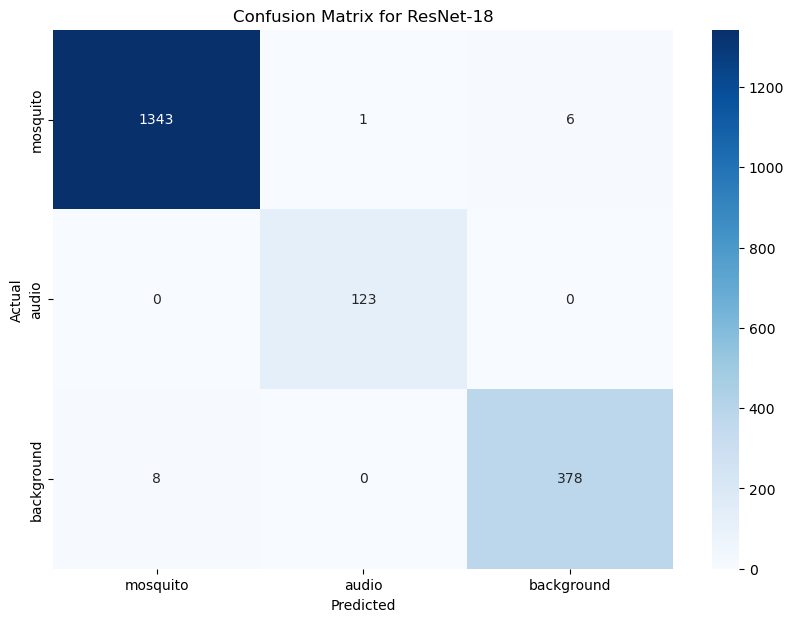

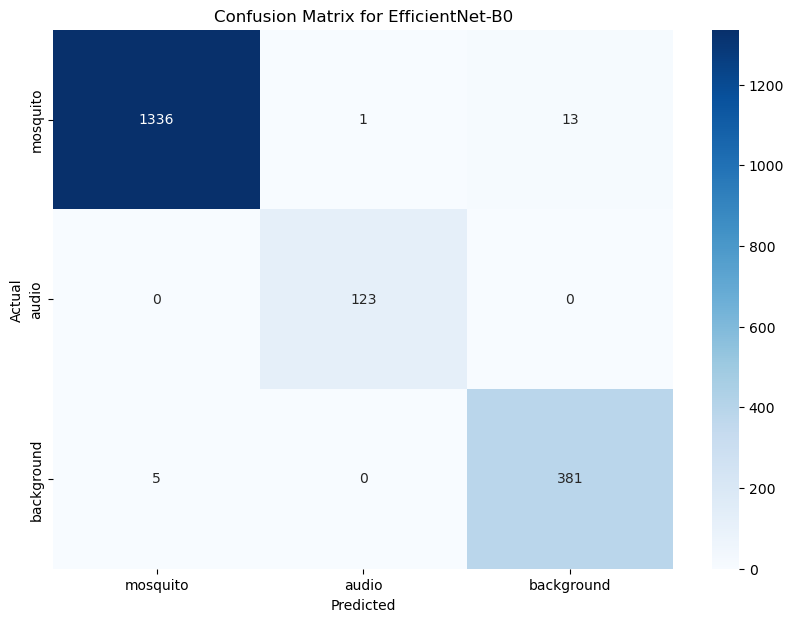

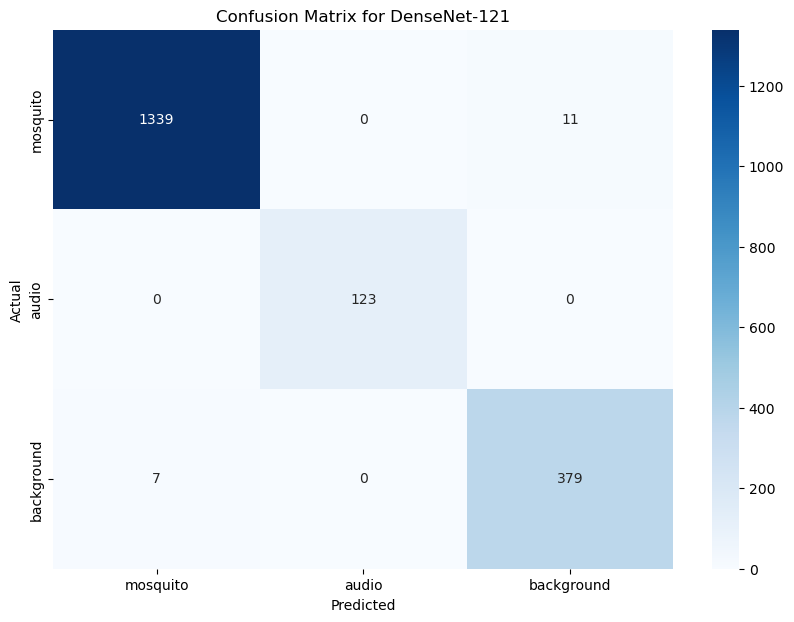

In [8]:
plot_confusion_matrix(y_true, y_pred_resnet, 'ResNet-18')
plot_confusion_matrix(y_true, y_pred_efficientnet, 'EfficientNet-B0')
plot_confusion_matrix(y_true, y_pred_densenet, 'DenseNet-121')

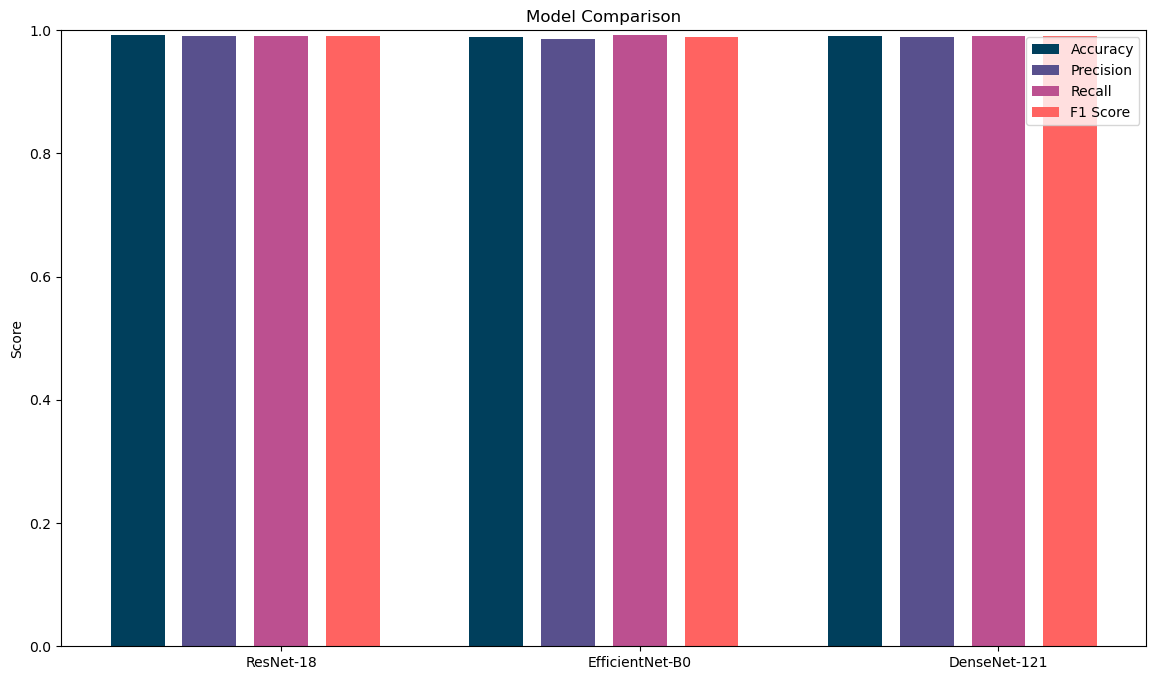

In [27]:
plot_model_comparison(y_true, y_pred_resnet, y_pred_efficientnet, y_pred_densenet)